In [3]:
# Recommendations for Stakeholder

In [4]:
# --- EDA Project December 2025 - Data Science & AI Bootcamp - by Helge Linnert ---

# library imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# project imports
from src.ccleaning import clean_data

# configurations - needed? 
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# read data, clean it and print
df = pd.read_csv("data/eda_project.csv")
df = clean_data(df)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.00,1180.00,5650.00,1.00,0,0.00,3,7,...,0.00,1955,0,98178,47.51,-122.26,1340.00,5650.00,2014-10-13,221900.00
1,6414100192,3,2.25,2570.00,7242.00,2.00,0,0.00,3,7,...,400.00,1951,19910,98125,47.72,-122.32,1690.00,7639.00,2014-12-09,538000.00
2,5631500400,2,1.00,770.00,10000.00,1.00,0,0.00,3,6,...,0.00,1933,0,98028,47.74,-122.23,2720.00,8062.00,2015-02-25,180000.00
3,2487200875,4,3.00,1960.00,5000.00,1.00,0,0.00,5,7,...,910.00,1965,0,98136,47.52,-122.39,1360.00,5000.00,2014-12-09,604000.00
4,1954400510,3,2.00,1680.00,8080.00,1.00,0,0.00,3,8,...,0.00,1987,0,98074,47.62,-122.05,1800.00,7503.00,2015-02-18,510000.00


In [ ]:
# Questions:
# 1. When is a good time to sell in the next 18 months? 
# 2. Should I renovate this house I have built in 1970?
# 3. Where can I get the highest profits?

# Hypotheses:
# 1. A good time to sell is in March.
# 2. Renovating a house built in 1970 will increase the price per square foot.
# 3. Highest profits can be gained from renovating old houses built between 1900-1930.

# ---
# Recommendations
# Re sales time: good time to sell is in April
# Re renovation Y/N: 
# Re high profits  


# TBD:
# historical houses
# best neighborhoods

#dates: 
# min 2014-05-02, max 2015-05-27
# count 372

In [80]:
# -- 
#pps
df['pps_living'] = (df['price']/df['sqft_living'])


# -- create bins for months
bins = list(range(1900, 2030, 10))
labels = [
    '1900s','10s','20s','30s',
    '40s','50s','60s','70s',
    '80s','90s','2000s','2010s'
]

df['yr_build_decade'] = pd.cut(
    df['yr_built'],
    bins=bins,
    labels=labels,
    right=False    
)



In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   bedrooms         21597 non-null  int64         
 2   bathrooms        21597 non-null  float64       
 3   sqft_living      21597 non-null  float64       
 4   sqft_lot         21597 non-null  float64       
 5   floors           21597 non-null  float64       
 6   waterfront       21597 non-null  int64         
 7   view             21534 non-null  float64       
 8   condition        21597 non-null  int64         
 9   grade            21597 non-null  int64         
 10  sqft_above       21597 non-null  float64       
 11  sqft_basement    21145 non-null  float64       
 12  yr_built         21597 non-null  int64         
 13  yr_renovated     21597 non-null  int64         
 14  zipcode          21597 non-null  int64

In [51]:
df_months = df[['date', 'price']].copy()
df_months['month'] = df['date'].dt.month
df_months.head()





,date,price,month
0,2014-10-13,221900.00,10
1,2014-12-09,538000.00,12
2,2015-02-25,180000.00,2
3,2014-12-09,604000.00,12
4,2015-02-18,510000.00,2


In [88]:
#df groupby month: look at price and pps_living
#aggregate the following columns
monthly_prices = df.groupby(df_months['month'])[['price', 'pps_living']].agg(
                    avg_price = ('price', 'mean'),
                    median_price = ('price', 'median'),
                    avg_pps = ('pps_living', 'mean'),
                    row_count = ('price', 'count')
                    )

monthly_prices

,avg_price,median_price,avg_pps,row_count
month,,,,
1,525963.25,438500.00,256.77,978
2,508520.05,426500.00,259.77,1247
3,544057.68,450000.00,273.81,1875
4,562215.62,477000.00,278.84,2229
5,550849.75,462000.00,269.11,2414
6,557534.32,465000.00,264.81,2178
7,544892.16,465000.00,259.69,2211
8,536655.21,442200.00,259.89,1939
9,529723.52,450000.00,259.38,1771


<Axes: xlabel='month'>

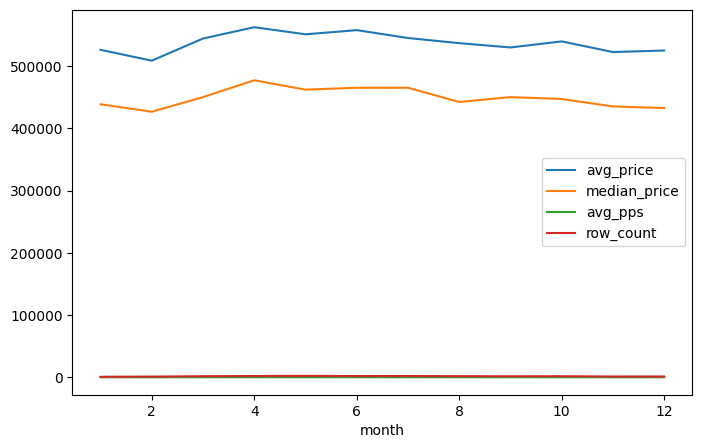

In [90]:
monthly_prices.plot(kind='line')